# Web Scraping Crypto Prices With Python

Yahia Chammami 

I'm going to pull cryptocurrencies prices from a public API and download them as Excel files. So,I need to import two libraries first: requests (to pull data from the web) and pandas to process it.

## Import Libraries :

In [1]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from Cryptowatch [ https://cryptowat.ch/fr-fr ].

In [2]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [3]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-03-17 00:08:57.292404')

In [4]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [5]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

### Bitcoin: 

In [6]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-03-17 01:00:00,25051,25052,24954,24977,42.097814,1.052077e+06
2023-03-17 02:00:00,24977,25779,24975,25725,314.502707,7.998633e+06
2023-03-17 03:00:00,25729,25956,25559,25668,206.988920,5.335253e+06
2023-03-17 04:00:00,25657,25847,25641,25834,68.529671,1.765481e+06
2023-03-17 05:00:00,25848,25937,25776,25799,112.396451,2.906100e+06


<AxesSubplot:xlabel='CloseTime'>

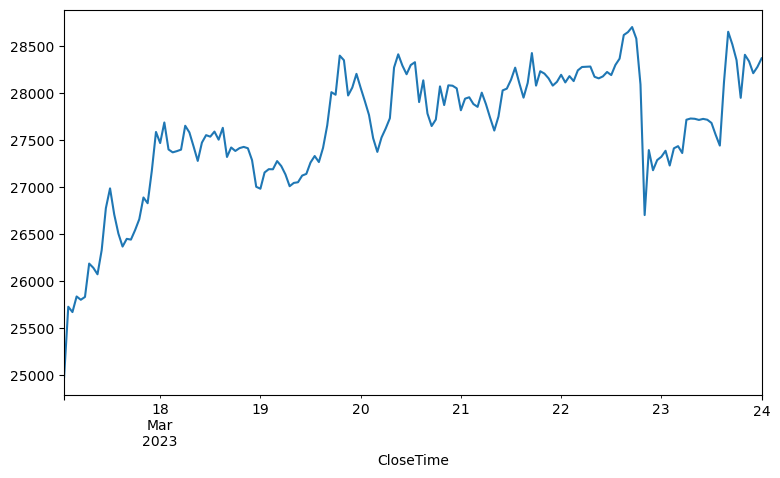

In [7]:
btc['ClosePrice'].plot(figsize=(9, 5))


### Ether:

In [8]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-03-17 01:00:00,1676.9,1677.6,1666.3,1668.8,170.177512,2.844510e+05
2023-03-17 02:00:00,1668.7,1701.2,1668.0,1698.8,1775.459985,2.998472e+06
2023-03-17 03:00:00,1701.0,1727.9,1695.9,1709.0,450.261409,7.713723e+05
2023-03-17 04:00:00,1709.8,1716.7,1704.6,1712.7,85.540126,1.463851e+05
2023-03-17 05:00:00,1713.3,1715.3,1707.5,1708.5,139.956154,2.394091e+05


<AxesSubplot:xlabel='CloseTime'>

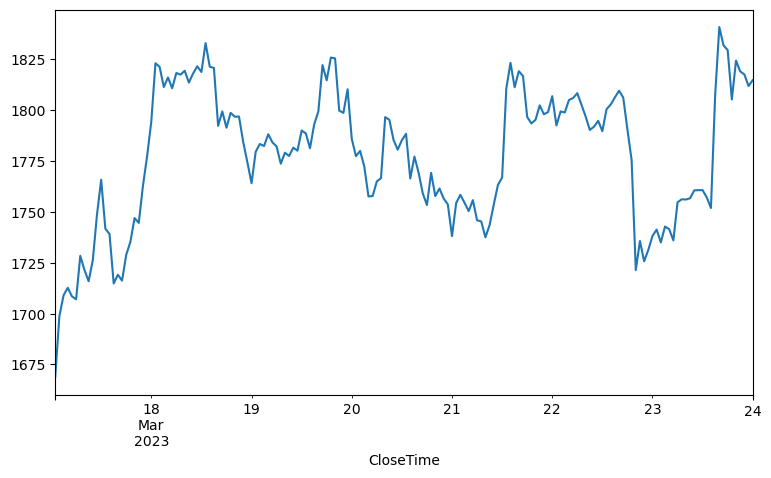

In [9]:
eth['ClosePrice'].plot(figsize=(9, 5))

## Dynamic plots with Bokeh :

 Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [11]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [12]:
output_notebook()

Loading BokehJS ...

And we generate the plot:

In [13]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

 As you can see, the plot is interactive. Try zomming in and out, and scrolling in the plot.

## Exporting to Excel :

We're now ready to generate an Excel file from the downloaded prices. Our first step will be to create an "Excel writer", a component from the pandas package:

In [14]:
writer = pd.ExcelWriter('cryptos.xlsx')

We'll now write both our Bitcoin and Ether data as separate sheets:

In [15]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [16]:
eth.to_excel(writer, sheet_name='Ether')

And finally, we can save the file:

In [17]:
writer.save()